In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


read from a file named “input.txt” containing two sequences of 16 comma-
delimited integers in the first line. The second sequence should be delimited by
2
a semicolon (e.g., 1, 2, 3, 4, 5, . . . , 16; 1, 2, 3, 4, 5, . . . , 16). 

The following functions are given in the project description

In [3]:
def algorithm_1(matrix_a: np.ndarray, matrix_b: np.ndarray, matrix_c: np.ndarray, 
                p: int, q: int, r: int) -> None:
    """
    Multiply two matrices using the traditional algorithm
    Parameters
    ----------
    matrix_a : np.ndarray
        The first matrix to multiply
    matrix_b : np.ndarray
        The second matrix to multiply
    matrix_c : np.ndarray
        The matrix to store the result in
    p : int
        The number of rows in matrix_a
    q : int
        The number of columns in matrix_a and the number of rows in matrix_b
    r : int
        The number of columns in matrix_b
    Returns
    -------
    None
    """
    for i in range(p):
        for j in range(r):
            for k in range(q):
                matrix_c[i][j] += matrix_a[i][k] * matrix_b[k][j]
    return

In [4]:
def algorithm_2(matrix_a: np.ndarray, matrix_b: np.ndarray, matrix_c: np.ndarray, p: int, 
                q: int, r: int, T: int =5) -> None:
    """
    Multiply two matricies using block matrix multiplication
    Parameters
    ----------
    matrix_a : np.ndarray
        The first matrix to multiply
    matrix_b : np.ndarray
        The second matrix to multiply
    matrix_c : np.ndarray
        The matrix to store the result in
    p : int
        The number of rows in matrix_a
    q : int
        The number of columns in matrix_a and the number of rows in matrix_b
    r : int
        The number of columns in matrix_b
    T : int
        The size of the tiles
    Returns
    -------
    None
    """
    for i in range(0, p, T):
        for j in range(0, r, T):
            for k in range(0, q, T):
                for i1 in range(i, min(i + T, p)):
                    for j1 in range(j, min(j + T, r)):
                        for k1 in range(k, min(k + T, q)):
                            matrix_c[i1][j1] += matrix_a[i1][k1] * matrix_b[k1][j1]
    return None

In [5]:
def algorithm_3(matrix_a: np.ndarray, matrix_b: np.ndarray, matrix_c: np.ndarray, p: int, q: int, r: int) -> None:
    """
    split the matricies into 2 submatricies and multiply them using the traditional algorithm
    Parameters
    ----------
    matrix_a : np.ndarray
        The first matrix to multiply
    matrix_b : np.ndarray
        The second matrix to multiply
    matrix_c : np.ndarray
        The matrix to store the result in
    p : int
        The number of rows in matrix_a
    q : int
        The number of columns in matrix_a and the number of rows in matrix_b
    r : int
        The number of columns in matrix_b
    Returns
    -------
    None
    """
    if max(p, q, r) <= 2:
        algorithm_1(matrix_a, matrix_b, matrix_c, p, q, r)
    else:
        if max(p, q, r) == p:
            # split A horizontally
            p1 = p // 2
            algorithm_3(matrix_a[:p1, :], matrix_b, matrix_c[:p1, :], p1, q, r)
            algorithm_3(matrix_a[p1:, :], matrix_b, matrix_c[p1:, :], p - p1, q, r)
        elif max(p, q, r) == q:
            q1 = q // 2
            # split A vertically and B horizontally
            algorithm_3(matrix_a[:, :q1], matrix_b[:q1, :], matrix_c, p, q1, r)
            algorithm_3(matrix_a[:, q1:], matrix_b[q1:, :], matrix_c, p, q - q1, r)
        else:
            r1 = r // 2
            # split B vertically
            algorithm_3(matrix_a, matrix_b[:, :r1 + 1], matrix_c[:, :r1 + 1], p, q, r1)
            algorithm_3(matrix_a, matrix_b[:, r1:], matrix_c[:, r1:], p, q, r - r1)
    return None

In [6]:
def algorithm_4(matrix_a: np.ndarray, matrix_b: np.ndarray, matrix_c: np.ndarray) -> np.ndarray:
    """
    Block matrix multiplication with a recursive call using 4 blocks
    Parameters
    ----------
    matrix_a : np.ndarray
        The first matrix to multiply
    matrix_b : np.ndarray
        The second matrix to multiply
    matrix_c : np.ndarray
        The matrix to store the result in
    Returns
    -------
    False if the matrices are not the same size
    """

    p, q = matrix_a.shape
    r, s = matrix_b.shape
    if p != q != r != s:
        raise ValueError('Matrices are not the same size or not square matrices.')
    if p == 1:
        val = matrix_a[0][0] * matrix_b[0][0]
        return val
    else:
        p1 = p // 2
        q1 = q // 2
        s1 = s // 2

        # split the matrices into 4 submatrices
        a11 = matrix_a[:p1, :q1]
        a12 = matrix_a[:p1, q1:]
        a21 = matrix_a[p1:, :q1]
        a22 = matrix_a[p1:, q1:]

        b11 = matrix_b[:p1, :q1]
        b12 = matrix_b[:p1, q1:]
        b21 = matrix_b[p1:, :q1]
        b22 = matrix_b[p1:, q1:]
        
        c11 = matrix_c[:p1, :s1]
        c12 = matrix_c[:p1, s1:]
        c21 = matrix_c[p1:, :s1]
        c22 = matrix_c[p1:, s1:]

        # we use the recursive call to calculate the submatrices
        # the temp_c variables are used to store the results of the recursive calls
        # we cant just use the normal matrix_c because we are using the same matrix_c to store the results of the recursive calls
        # and we do not want to overwrite the results of the recursive calls
        temp_c11 = algorithm_4(a11, b11, np.zeros([p1,q1])) + algorithm_4(a12, b21, np.zeros([p1,q1]))
        c11 = temp_c11
        temp_c12 = algorithm_4(a11, b12, np.zeros([p1,q1])) + algorithm_4(a12, b22, np.zeros([p1,q1]))
        c12 = temp_c12
        temp_c21 = algorithm_4(a21, b11, np.zeros([p1,q1])) + algorithm_4(a22, b21, np.zeros([p1,q1]))
        c21 = temp_c21
        temp_c22 = algorithm_4(a21, b12, np.zeros([p1,q1])) + algorithm_4(a22, b22, np.zeros([p1,q1]))
        c22 = temp_c22

        # Combine submatrices to form the resulting matrix C
        matrix_c[:p1, :s1] = c11
        matrix_c[:p1, s1:] = c12
        matrix_c[p1:, :s1] = c21
        matrix_c[p1:, s1:] = c22


        return matrix_c

In [7]:
def algorithm_5(matrix_a: np.ndarray, matrix_b: np.ndarray, matrix_c: np.ndarray) -> None:
    """
    Strassen's algorithm for matrix multiplication
    https://www.youtube.com/watch?app=desktop&v=0oJyNmEbS4w
    Parameters
    ----------
    matrix_a : np.ndarray
        The first matrix to multiply
    matrix_b : np.ndarray
        The second matrix to multiply
    matrix_c : np.ndarray
        The matrix to store the result in
    Returns
    -------
    None
    """
    p, q = matrix_a.shape
    r, s = matrix_b.shape
    if p != q != r != s or p != r or q != s:
        raise ValueError('Matrices are not the same size or not square matrices.')
    if p < 3:
        algorithm_1(matrix_a, matrix_b, matrix_c, p, q, r)
    else:
        # split the matrices into 4 submatrices
        p1 = p // 2
        q1 = q // 2
        r1 = r // 2
        s1 = s // 2
        
        a11 = matrix_a[:p1, :q1]
        a12 = matrix_a[:p1, q1:]
        a21 = matrix_a[p1:, :q1]
        a22 = matrix_a[p1:, q1:]
        b11 = matrix_b[:q1, :s1]
        b12 = matrix_b[:q1, s1:]
        b21 = matrix_b[q1:, :s1]
        b22 = matrix_b[q1:, s1:]

        # recursively calculate the 7 parts 
        m1 = algorithm_5(np.add(a11, a22), np.add(b11, b22), np.zeros([p1, s1]))
        m2 = algorithm_5(np.add(a21, a22), b11, np.zeros([p1, s1]))
        m3 = algorithm_5(a11, np.subtract(b12, b22), np.zeros([p1, s1]))
        m4 = algorithm_5(a22, np.subtract(b21, b11), np.zeros([p1, s1]))
        m5 = algorithm_5(np.add(a11, a12), b22, np.zeros([p1, s1]))
        m6 = algorithm_5(np.subtract(a21, a11), np.add(b11, b12), np.zeros([p1, s1]))
        m7 = algorithm_5(np.subtract(a12, a22), np.add(b21, b22), np.zeros([p1, s1]))

        # calculate the submatrices
        c11 = np.subtract(np.add(np.add(m1, m4), m7), m5)
        c12 = np.add(m3, m5)
        c21 = np.add(m2, m4)
        c22 = np.subtract(np.add(np.add(m1, m3), m6), m2)

        # Combine submatrices to form the resulting matrix C
        matrix_c[:p1, :s1] = c11
        matrix_c[:p1, s1:] = c12
        matrix_c[p1:, :s1] = c21
        matrix_c[p1:, s1:] = c22

    return matrix_c




In [8]:
def matrix_chain_order(p: np.ndarray) -> tuple:
    """
    Find the optimal order to multiply a chain of matrices
    Parameters
    ----------
    p : np.ndarray
        The dimensions of the matrices
    Returns
    -------
    tuple
        m : np.ndarray
            The minimum number of scalar multiplications
        s : np.ndarray
            The optimal order to multiply the matrices
    """
    n = len(p) - 1
    m = np.zeros((n, n))
    s = np.zeros((n, n))
    for l in range(2, n + 1):
        for i in range(n - l + 1):
            j = i + l - 1
            m[i][j] = np.inf
            for k in range(i, j):
                q = m[i][k] + m[k + 1][j] + p[i] * p[k + 1] * p[j + 1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k
    return m, s

def matrix_chain_multiply(matrix_list: list, s: np.ndarray, i: int, j: int) -> np.ndarray:
    """
    Multiply a chain of matrices using the optimal order
    Parameters
    ----------
    matrix_list : list
        The list of matrices to multiply
    s : np.ndarray
        The optimal order to multiply the matrices
    i : int
        The starting index
    j : int
        The ending index
    Returns
    -------
    np.ndarray
        The resulting matrix
    """
    if i == j:
        return matrix_list[i]
    else:
        matrix_a = matrix_chain_multiply(matrix_list, s, i, int(s[i][j]))
        matrix_b = matrix_chain_multiply(matrix_list, s, int(s[i][j]) + 1, j)
        matrix_c = np.zeros((matrix_a.shape[0], matrix_b.shape[1]))
        algorithm_1(matrix_a, matrix_b, matrix_c, matrix_a.shape[0], matrix_a.shape[1], matrix_b.shape[1])
        return matrix_c

# driver test code
# def main():
#     # create a list of matrices
#     matrix_list = [np.random.randint(1, 10, (3, 3)) for _ in range(3)]
#     for matrix in matrix_list:
#         print(matrix)
#         print()
#     # create a list of dimensions
#     p = [matrix.shape[0] for matrix in matrix_list] + [matrix_list[-1].shape[1]]
#     # find the optimal order to multiply the matrices
#     m, s = matrix_chain_order(p)
#     # multiply the matrices using the optimal order
#     matrix_c = matrix_chain_multiply(matrix_list, s, 0, len(matrix_list) - 1)
#     print(matrix_c)

# if __name__ == "__main__":
#     main()

# Matrix Multiplication

## Part A

In [9]:
def matrix_file_in_all_algos(file_name: str) -> bool:
    """
    Read a file with two 4x4 matrices and run each of the 5 algorithms
    Parameters
    ----------
    file_name : str
        The name of the file to read
    Returns
    -------
    bool
        True if the file was read successfully, False otherwise
    """
    try:
        with open(file_name, 'r') as file:
            # read file into a list
            lines = file.readlines()
            lines = lines[0].split(';')
            lines = [line.split(',') for line in lines]
            lines = [[int(x) for x in line] for line in lines]
            

            
            # convert list into a numpy array
            matrix_a = np.array(lines[0]).reshape(4, 4)
            matrix_b = np.array(lines[1]).reshape(4, 4)
            matrix_c = np.zeros([4, 4])

            # run each algorithm
            algorithm_1(matrix_a, matrix_b, matrix_c, 4, 4, 4)
            print("Algorithm 1:\n", matrix_c)
            matrix_c = np.zeros([4, 4])

            algorithm_2(matrix_a, matrix_b, matrix_c, 4, 4, 4)
            print("\n\nAlgorithm 2:\n", matrix_c)
            matrix_c = np.zeros([4, 4])

            algorithm_3(matrix_a, matrix_b, matrix_c, 4, 4, 4)
            print("\n\nAlgorithm 3:\n", matrix_c)
            matrix_c = np.zeros([4, 4])

            matrix_c = algorithm_4(matrix_a, matrix_b, matrix_c) # this algorithm is not working
            print("\n\nAlgorithm 4:\n", matrix_c)
            matrix_c = np.zeros([4, 4])

            matrix_c = algorithm_5(matrix_a, matrix_b, matrix_c) # this algorithm runs but the result is not correct
            print("\n\nAlgorithm 5:\n", matrix_c)
            matrix_c = np.zeros([4, 4])


            return
    except FileNotFoundError:

        return False
    
matrix_file_in_all_algos('input.txt')
    

Algorithm 1:
 [[ 189.  100.  110.  120.]
 [ 697.  228.  254.  280.]
 [1205.  356.  398.  440.]
 [1713.  484.  542.  600.]]


Algorithm 2:
 [[ 189.  100.  110.  120.]
 [ 697.  228.  254.  280.]
 [1205.  356.  398.  440.]
 [1713.  484.  542.  600.]]


Algorithm 3:
 [[ 189.  100.  110.  120.]
 [ 697.  228.  254.  280.]
 [1205.  356.  398.  440.]
 [1713.  484.  542.  600.]]


Algorithm 4:
 [[ 189.  100.  110.  120.]
 [ 697.  228.  254.  280.]
 [1205.  356.  398.  440.]
 [1713.  484.  542.  600.]]


Algorithm 5:
 [[ 189.  100.  110.  120.]
 [ 697.  228.  254.  280.]
 [1205.  356.  398.  440.]
 [1713.  484.  542.  600.]]


## Experiment - I (Part B)

In [56]:
import time
import pandas as pd
import math

sizes = list(range(10, 310, 10))

df = pd.DataFrame(columns=['Size', 'Algorithm-1', 'Algorithm-2', 'Algorithm-3', 'T1(n)', 'T2(n)', 'T3(n)'])

for size in sizes:
    matrix_a = np.random.rand(size, size)
    matrix_b = np.random.rand(size, size)
    matrix_c = np.zeros([size, size])

    repeat_times = 2
    
    # Algorithm-1
    start_time = time.time()
    for _ in range(repeat_times):
        algorithm_1(matrix_a, matrix_b, matrix_c, size, size, size)
    end_time = time.time()
    algorithm_1_time = (end_time - start_time) / repeat_times
    
    # Algorithm-2
    start_time = time.time()
    for _ in range(repeat_times):
        algorithm_2(matrix_a, matrix_b, matrix_c, size, size, size)
    end_time = time.time()
    algorithm_2_time = (end_time - start_time) / repeat_times

    # Algorithm-3
    start_time = time.time()
    for _ in range(repeat_times):
        algorithm_3(matrix_a, matrix_b, matrix_c, size, size, size)
    end_time = time.time()
    algorithm_3_time = (end_time - start_time) / repeat_times

    # Algorithm-1 time complexity
    T1 = size ** 3
    T2 = size ** 3
    T3 = math.log(size, 2) * size ** 3
    
    
    df = pd.concat([df, pd.DataFrame({'Size': [size], 'Algorithm-1': [algorithm_1_time], 'Algorithm-2': [algorithm_2_time], 'Algorithm-3': [algorithm_3_time], 'T1(n)': [T1], 'T2(n)': [T2], 'T3(n)': [T3]})], ignore_index=True)
    print(df)

# scale the theorectical time complexity so we can compare it to the actual time complexity

scale_T1 = (df['Algorithm-1'].max() - df['Algorithm-1'].min())/ (df['T1(n)'].max() - df['T1(n)'].min())
df['T1(n)'] = (df['T1(n)'] - df['T1(n)'].min()) * scale_T1 + df['Algorithm-1'].min()

scale_T2 = (df['Algorithm-2'].max() - df['Algorithm-2'].min())/ (df['T2(n)'].max() - df['T2(n)'].min())
df['T2(n)'] = (df['T2(n)'] - df['T2(n)'].min()) * scale_T2 + df['Algorithm-2'].min()

scale_T3 = (df['Algorithm-3'].max() - df['Algorithm-3'].min())/ (df['T3(n)'].max() - df['T3(n)'].min())
df['T3(n)'] = (df['T3(n)'] - df['T3(n)'].min()) * scale_T3 + df['Algorithm-3'].min()

print(df)




C:\Users\owens\AppData\Local\Temp\ipykernel_29584\1864154030.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'Size': [size], 'Algorithm-1': [algorithm_1_time], 'Algorithm-2': [algorithm_2_time], 'Algorithm-3': [algorithm_3_time], 'T1(n)': [T1], 'T2(n)': [T2], 'T3(n)': [T3]})], ignore_index=True)


  Size  Algorithm-1  Algorithm-2  Algorithm-3 T1(n) T2(n)        T3(n)
0   10     0.000993       0.0005     0.001503  1000  1000  3321.928095
  Size  Algorithm-1  Algorithm-2  Algorithm-3 T1(n) T2(n)         T3(n)
0   10     0.000993     0.000500     0.001503  1000  1000   3321.928095
1   20     0.006008     0.006261     0.012008  8000  8000  34575.424759
  Size  Algorithm-1  Algorithm-2  Algorithm-3  T1(n)  T2(n)          T3(n)
0   10     0.000993     0.000500     0.001503   1000   1000    3321.928095
1   20     0.006008     0.006261     0.012008   8000   8000   34575.424759
2   30     0.029579     0.024769     0.036763  27000  27000  132486.046081
  Size  Algorithm-1  Algorithm-2  Algorithm-3  T1(n)  T2(n)          T3(n)
0   10     0.000993     0.000500     0.001503   1000   1000    3321.928095
1   20     0.006008     0.006261     0.012008   8000   8000   34575.424759
2   30     0.029579     0.024769     0.036763  27000  27000  132486.046081
3   40     0.043763     0.049503     0.096

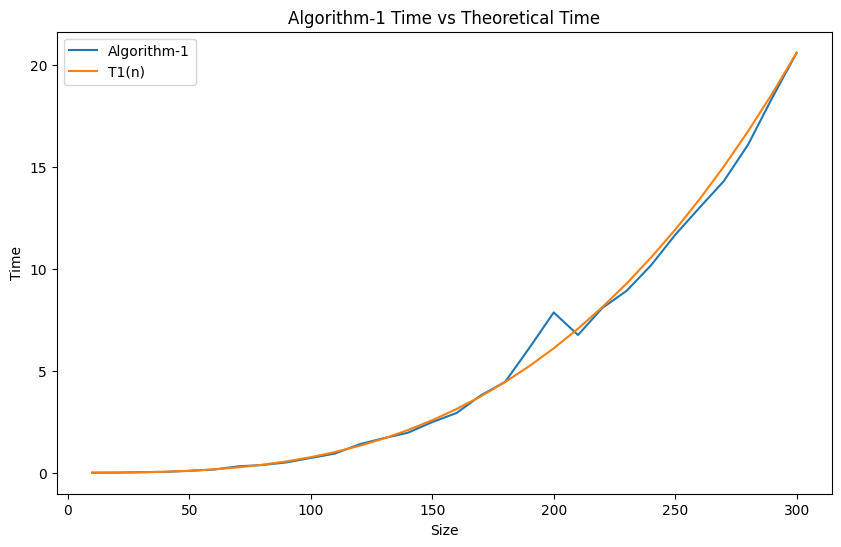

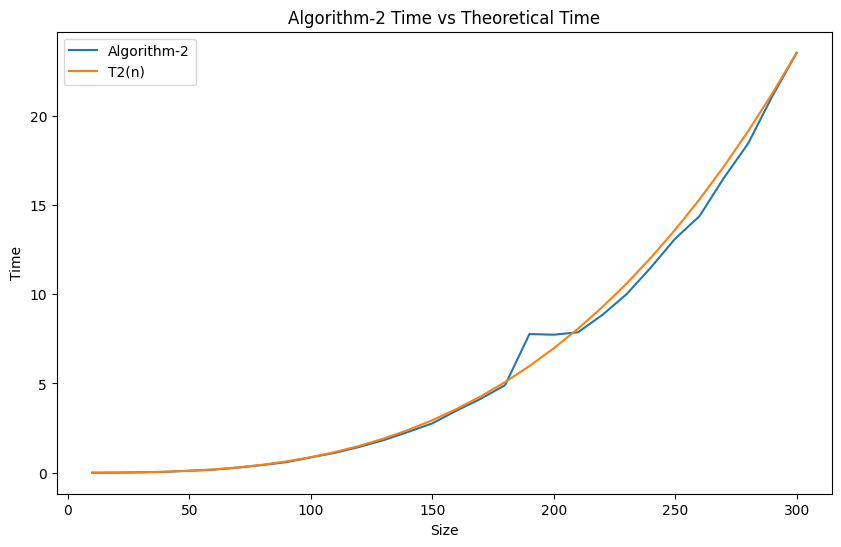

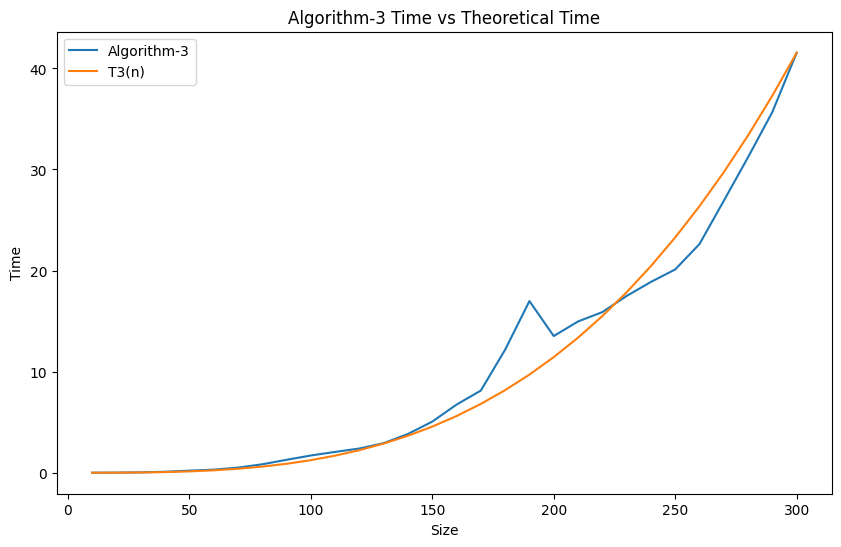

In [57]:
import matplotlib.pyplot as plt

# Plot Algorithm-1
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Algorithm-1'], label='Algorithm-1')
plt.plot(df['Size'], df['T1(n)'], label='T1(n)')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Algorithm-1 Time vs Theoretical Time')
plt.legend()
plt.show()

# Plot Algorithm-2
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Algorithm-2'], label='Algorithm-2')
plt.plot(df['Size'], df['T2(n)'], label='T2(n)')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Algorithm-2 Time vs Theoretical Time')
plt.legend()
plt.show()

# Plot Algorithm-3
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Algorithm-3'], label='Algorithm-3')
plt.plot(df['Size'], df['T3(n)'], label='T3(n)')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Algorithm-3 Time vs Theoretical Time')
plt.legend()
plt.show()

## Experiment - II (Part C)

In [11]:
# some python code

# Matrix-Chain Multiplication Problem

In [12]:
# some python code here